{2, 3, 4, 6, 13, 17, 18, 19, 21, 22, 23, 28, 29, 35, 37, 38, 39, 42, 43, 46, 47, 48, 49}
(array([35, 35, 35, 35, 35, 35, 35, 35, 35, 35, nan, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, nan, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       nan, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, nan, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 4

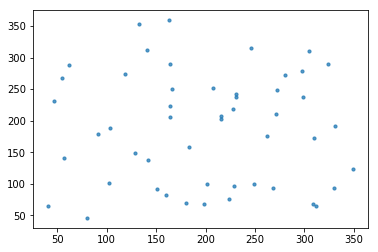

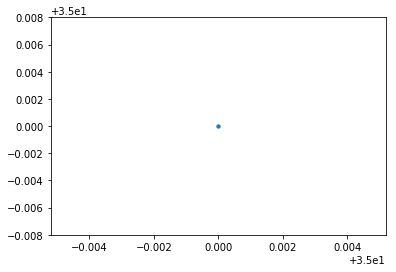

(3251, 47841) 0:00:03.303


<Figure size 432x288 with 0 Axes>

In [138]:
#!/usr/bin/python

filepath = 'input.txt' 

from datetime import datetime
import re
import numpy as np
import matplotlib.pyplot as plt
startTime = datetime.now()

def main() -> "result1, result2":
    nums = set()
    result1 , result2 = 0, 0
    
    with open(filepath) as f:
        for line in f.readlines():
            nums.add(tuple(int(x) for x in re.findall(r'\d+', line)))
        f.close()
        
    minx, maxx = min(pos[0] for pos in nums), max(pos[0] for pos in nums) # define domain
    miny, maxy = min(pos[1] for pos in nums), max(pos[1] for pos in nums)
    
    array = np.array([[None] * (maxx - minx + 1)] * (maxy - miny + 1)) # array = y, array[0] = x
    region = np.array([[False] * (maxx - minx + 1)] * (maxy - miny + 1))
    
    for x in range(len(array[0])): # for every position in grid
        for y in range(len(array)):  
            scores = []
            for i, bomb in enumerate(nums): # obtain list of manhattan scores for all mines
                scores.append(abs(x + minx - bomb[0]) + abs(y + miny - bomb[1]))
            if scores.count(min(scores)) > 1: # if 2 mines tie
                array[y, x] = np.nan
            else:
                array[y, x] = scores.index(min(scores))
            region[y,x] = sum(scores) < 10000 # part 2 sum of manhattan

    edges = set() # init and add values to edge indexes
    for y in [0, len(array)-1]: # top, bottom
        for x in range(len(array[0])): 
            edges.add(array[y,x])     
    for y in range(len(array)): #left, right
        for x in [0, len(array[0])-1]: 
            edges.add(array[y,x])
    edges.remove(np.nan)
    
    sizes = dict(collections.Counter(array.flatten()))
    sort = [None]*(len(sizes))
    for key, value in sizes.items(): # convert dict to list
        if key is not np.nan:
            sort[key] = value

    sort = [x for x in sort if x != None]
    reference = sort.copy() # obtain reference of the pre-sorted set, to alter index value to
                            # the new post-sorted value in the edges set
    sort.sort(reverse=True)

    newEdges = set() # create new edge set
    for i in edges: 
        newEdges.add(sort.index(reference[i]))

    for i, count in enumerate(sort): # check if i is hit on any edges 
        if i in newEdges:
            continue
        else: # not diverging to infinity
            result1 = count
            break
            
    print(edges)
    
    name = []
    for x in range(len(array[0])): # for every position in grid
        for y in range(len(array)):
    
    
    print(name)
    result2 = sum(sum(region))
    plotter(nums)
    
    plotter(name)
    
    return result1, result2

def plotter(inlet):
    plt.scatter(list(x[0] for x in inlet), list(x[1] for x in inlet), s=10, alpha=0.75)
    plt.show()
    plt.clf()

if __name__ == '__main__':
    print(main(), str(datetime.now() - startTime)[:-3]) # (3251, 47841) 0:00:02.997